In [1]:
import pandas as pd
import numpy as np   

In [2]:
# Plotting libraries to plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel("2019.xlsx")

In [4]:
data.head()

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,0,225520077,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022-02-02 00:00:00,2022,2,Wednesday,0,NaN,WASHINGTON ST,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)"
1,1,222648862,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022-02-05 18:25:00,2022,2,Saturday,18,NaN,WASHINGTON ST,42.329748,-71.084540,"(42.329748204791635, -71.08454011649543)"
2,2,222201764,724,AUTO THEFT,AUTO THEFT,C6,200,0,2022-01-09 00:00:00,2022,1,Sunday,0,NaN,W BROADWAY,42.341288,-71.054679,"(42.341287504390436, -71.05467932649397)"
3,3,222201559,301,ROBBERY - STREET,ROBBERY,D4,,0,2022-03-05 13:00:00,2022,3,Saturday,13,NaN,ALBANY ST,42.333184,-71.073939,"(42.333184490911954, -71.07393881002383)"
4,4,222111641,619,LARCENY ALL OTHERS,LARCENY ALL OTHERS,D14,778,0,2022-02-14 12:30:00,2022,2,Monday,12,NaN,WASHINGTON ST,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)"


In [5]:
#3 Functions

# 3.1 Print 5 Rows for any column
def print_rows(name_column):
    return data[name_column][0:5]

# 3.2 Get Details of the Column
def describe_column(name_column):
    return data[name_column].describe()

In [6]:
# 4 Explore data
# 4.1 Shape
data.shape              # 245867, 18

(245867, 18)

In [7]:
# 4.2 Columns
data.columns 

Index(['Unnamed: 0', 'INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [8]:
# 4.3 Is Null
data.isnull().sum()

Unnamed: 0                  0
INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP      11847
OFFENSE_DESCRIPTION         0
DISTRICT                 2357
REPORTING_AREA              0
SHOOTING                    0
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART               245867
STREET                    682
Lat                         0
Long                        0
Location                    0
dtype: int64

In [9]:
# 4.4 Head gives the first 5 Rows
data.head()

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,0,225520077,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022-02-02 00:00:00,2022,2,Wednesday,0,NaN,WASHINGTON ST,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)"
1,1,222648862,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022-02-05 18:25:00,2022,2,Saturday,18,NaN,WASHINGTON ST,42.329748,-71.084540,"(42.329748204791635, -71.08454011649543)"
2,2,222201764,724,AUTO THEFT,AUTO THEFT,C6,200,0,2022-01-09 00:00:00,2022,1,Sunday,0,NaN,W BROADWAY,42.341288,-71.054679,"(42.341287504390436, -71.05467932649397)"
3,3,222201559,301,ROBBERY - STREET,ROBBERY,D4,,0,2022-03-05 13:00:00,2022,3,Saturday,13,NaN,ALBANY ST,42.333184,-71.073939,"(42.333184490911954, -71.07393881002383)"
4,4,222111641,619,LARCENY ALL OTHERS,LARCENY ALL OTHERS,D14,778,0,2022-02-14 12:30:00,2022,2,Monday,12,NaN,WASHINGTON ST,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)"


In [10]:
# 4.5 Tail gives last 5 rows
data.tail()

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
245862,87179,192077974,3130,SEARCH WARRANT,SEARCH WARRANT,E18,480,0,2019-09-27 06:54:00,2019,9,Friday,6,NaN,CUMMINS HWY,0.000000,0.000000,"(0, 0)"
245863,87180,192077986,3501,MISSING PERSON,MISSING PERSON,B2,276,0,2019-09-22 10:00:00,2019,9,Sunday,10,NaN,SHAWMUT AVE,0.000000,0.000000,"(0, 0)"
245864,87181,192077997,727,AUTO THEFT - LEASED/RENTED VEHICLE,AUTO THEFT - LEASED/RENTED VEHICLE,C6,178,0,2019-04-13 08:00:00,2019,4,Saturday,8,NaN,MASSACHUSETTS AVE,42.328564,-71.068353,"(42.32856401155176, -71.06835343222609)"
245865,87182,192078059,613,LARCENY SHOPLIFTING,LARCENY SHOPLIFTING,D4,134,0,2019-09-27 12:43:00,2019,9,Friday,12,NaN,BOYLSTON ST,0.000000,0.000000,"(0, 0)"
245866,87183,192078556,2500,NaN,Migrated Report - Kidnapping,A1,,0,2019-09-28 20:49:00,2019,9,Saturday,20,NaN,WASHINGTON ST,42.349973,-71.063488,"(42.34997256219053, -71.06348816860363)"


In [11]:
# 4.6 Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245867 entries, 0 to 245866
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           245867 non-null  int64         
 1   INCIDENT_NUMBER      245867 non-null  object        
 2   OFFENSE_CODE         245867 non-null  int64         
 3   OFFENSE_CODE_GROUP   234020 non-null  object        
 4   OFFENSE_DESCRIPTION  245867 non-null  object        
 5   DISTRICT             243510 non-null  object        
 6   REPORTING_AREA       245867 non-null  object        
 7   SHOOTING             245867 non-null  int64         
 8   OCCURRED_ON_DATE     245867 non-null  datetime64[ns]
 9   YEAR                 245867 non-null  int64         
 10  MONTH                245867 non-null  int64         
 11  DAY_OF_WEEK          245867 non-null  object        
 12  HOUR                 245867 non-null  int64         
 13  UCR_PART      

In [12]:
# 4.7 Code for Offence Group & its Columns
print_rows('OFFENSE_CODE')

0    3126
1    3831
2     724
3     301
4     619
Name: OFFENSE_CODE, dtype: int64

In [13]:
type(data)

pandas.core.frame.DataFrame

In [14]:
data["OFFENSE_CODE"].unique()

array([ 3126,  3831,   724,   301,   619,   801,   611,  3201,  2610,
        3410,   540,  2670,  3114,  3115,  1402,  3006,  3108,  2905,
        1832,  3802,   735,  3029,  1831,  3301,  3503,   706,  3001,
        3501,   613,   423,  3820,   617,  1810,  2647,  1501,  2101,
        3106,   614,  3801,   736,  3803,  3205,  3112,   530,  3625,
        3018,  1106,   520,  1300,  1102,  1107,  3207,  3807,  3502,
        3007,  2662,   615,  3402,  2907,  3110,  1001,  2403,  3008,
        3304,  2401,  2612,  3111,   612,   616,   727,  1109,  3116,
        1304,  2619,  2914,  2616,  2646,  3119,  3122,  3805,  2648,
        3830,   111,  3810,  3811,   531,  3130,  3202,  3004,  3821,
        1415,  2613,  1201,  3170,  2604,   900,  3125,  1825,  2102,
        2632,  3123,  2660,  2608,  1602,  1108,  2204,  3403,  2657,
        2622,  3203,  3305,  3005,   641,  3016,  2617,   121,  1601,
        2618,  2642,   990,   618,  2628,   122,  2007,  2671,  2006,
       99999,  1603,

In [15]:
data.groupby('OFFENSE_CODE').count()

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
OFFENSE_CODE,,,,,,,,,,,,,,,,,
100,5,5,0,5,5,5,5,5,5,5,5,5,0,5,5,5,5
111,113,113,113,113,113,113,113,113,113,113,113,113,0,112,113,113,113
121,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
122,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
300,11,11,0,11,11,11,11,11,11,11,11,11,0,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,1333,1333,1333,1333,1303,1333,1333,1333,1333,1333,1333,1333,0,1312,1333,1333,1333
3821,340,340,340,340,332,340,340,340,340,340,340,340,0,338,340,340,340
3830,976,976,976,976,955,976,976,976,976,976,976,976,0,961,976,976,976


In [16]:
describe_column('OFFENSE_CODE')

count    245867.000000
mean       2358.356018
std        1211.019491
min         100.000000
25%        1102.000000
50%        3005.000000
75%        3201.000000
max       99999.000000
Name: OFFENSE_CODE, dtype: float64

In [17]:
# 4.8 Code for Offence Group Description & its Columns
print_rows('OFFENSE_CODE_GROUP')

0                                      NaN
1    M/V - LEAVING SCENE - PROPERTY DAMAGE
2                               AUTO THEFT
3                         ROBBERY - STREET
4                       LARCENY ALL OTHERS
Name: OFFENSE_CODE_GROUP, dtype: object

In [18]:
describe_column('OFFENSE_CODE_GROUP')

count                 234020
unique                   174
top       INVESTIGATE PERSON
freq                   19481
Name: OFFENSE_CODE_GROUP, dtype: object

In [19]:
# 4.9 Code for Ploice District & its Columns
data["DISTRICT"].value_counts()

B2          35568
D4          31897
C11         31234
A1          26894
B3          26359
C6          19084
D14         16664
E18         14283
E13         13749
E5          11509
A7          10579
A15          5216
External      474
Name: DISTRICT, dtype: int64

In [20]:
print_rows('DISTRICT')

0    D14
1     B2
2     C6
3     D4
4    D14
Name: DISTRICT, dtype: object

In [21]:
describe_column('DISTRICT')

count     243510
unique        13
top           B2
freq       35568
Name: DISTRICT, dtype: object

In [22]:
data['DISTRICT'].unique()

array(['D14', 'B2', 'C6', 'D4', 'A1', 'E13', 'E5', 'B3', 'C11', 'A7',
       'E18', 'A15', nan, 'External'], dtype=object)

In [23]:
# 4.10 Code for Crime Occoured on Date & its Columns
print_rows('OCCURRED_ON_DATE')

0   2022-02-02 00:00:00
1   2022-02-05 18:25:00
2   2022-01-09 00:00:00
3   2022-03-05 13:00:00
4   2022-02-14 12:30:00
Name: OCCURRED_ON_DATE, dtype: datetime64[ns]

In [24]:
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])

In [25]:
describe_column('OCCURRED_ON_DATE')

count                  245867
unique                 201009
top       2020-06-11 11:00:00
freq                       30
first     2019-01-01 00:00:00
last      2022-03-29 03:27:00
Name: OCCURRED_ON_DATE, dtype: object

In [26]:
print_rows('OCCURRED_ON_DATE')

0   2022-02-02 00:00:00
1   2022-02-05 18:25:00
2   2022-01-09 00:00:00
3   2022-03-05 13:00:00
4   2022-02-14 12:30:00
Name: OCCURRED_ON_DATE, dtype: datetime64[ns]

In [27]:
# 4.11 Code for Year of crime & its Columns
print_rows('YEAR')

0    2022
1    2022
2    2022
3    2022
4    2022
Name: YEAR, dtype: int64

In [28]:
describe_column('YEAR')

count    245867.000000
mean       2020.067813
std           0.950326
min        2019.000000
25%        2019.000000
50%        2020.000000
75%        2021.000000
max        2022.000000
Name: YEAR, dtype: float64

In [29]:
data['YEAR'].unique()

array([2022, 2021, 2020, 2019], dtype=int64)

In [30]:
# 4.12 Code for Month of crime & its Columns
print_rows('MONTH')

0    2
1    2
2    1
3    3
4    2
Name: MONTH, dtype: int64

In [31]:
describe_column('MONTH')

count    245867.00000
mean          6.29627
std           3.45887
min           1.00000
25%           3.00000
50%           6.00000
75%           9.00000
max          12.00000
Name: MONTH, dtype: float64

In [32]:
data['MONTH'].unique()

array([ 2,  1,  3, 10,  5,  7, 11, 12,  6,  8,  4,  9], dtype=int64)

In [33]:
# 4.15 Street where crime is committed
print_rows('STREET')

0    WASHINGTON ST
1    WASHINGTON ST
2       W BROADWAY
3        ALBANY ST
4    WASHINGTON ST
Name: STREET, dtype: object

In [34]:
describe_column('STREET')

count            245185
unique            13895
top       WASHINGTON ST
freq              13986
Name: STREET, dtype: object

In [35]:
data['STREET'].unique()

array(['WASHINGTON ST', 'W BROADWAY', 'ALBANY ST', ..., 'DEDHAM PKWY',
       'FRANKLIN HOLBROOK', 'PINEBROOK LN'], dtype=object)

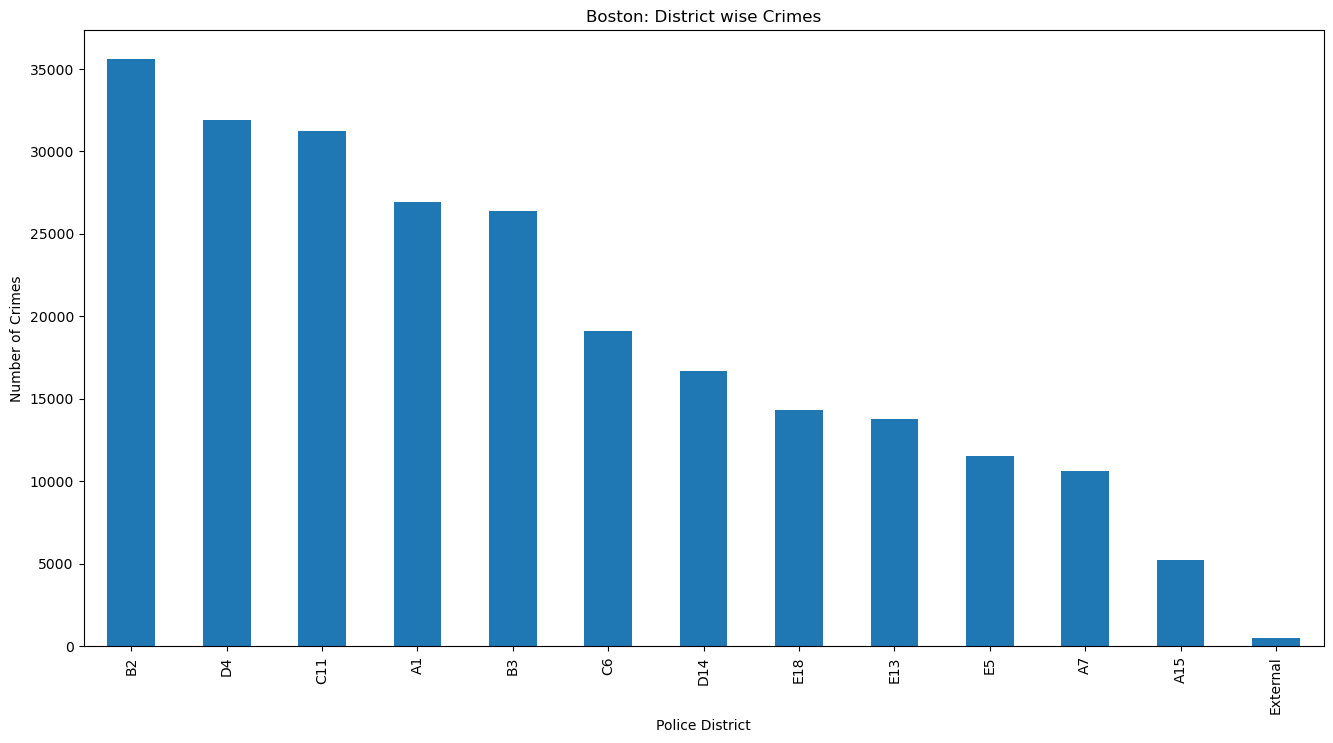

In [36]:
# 5 Data Visualization
# 5.1 District
plt.figure(figsize=(16,8))
data['DISTRICT'].value_counts().plot.bar()
plt.title('Boston: District wise Crimes')
plt.ylabel('Number of Crimes')
plt.xlabel('Police District')
plt.show()
# Maxium number of Crimes observed in Centeral in LA.

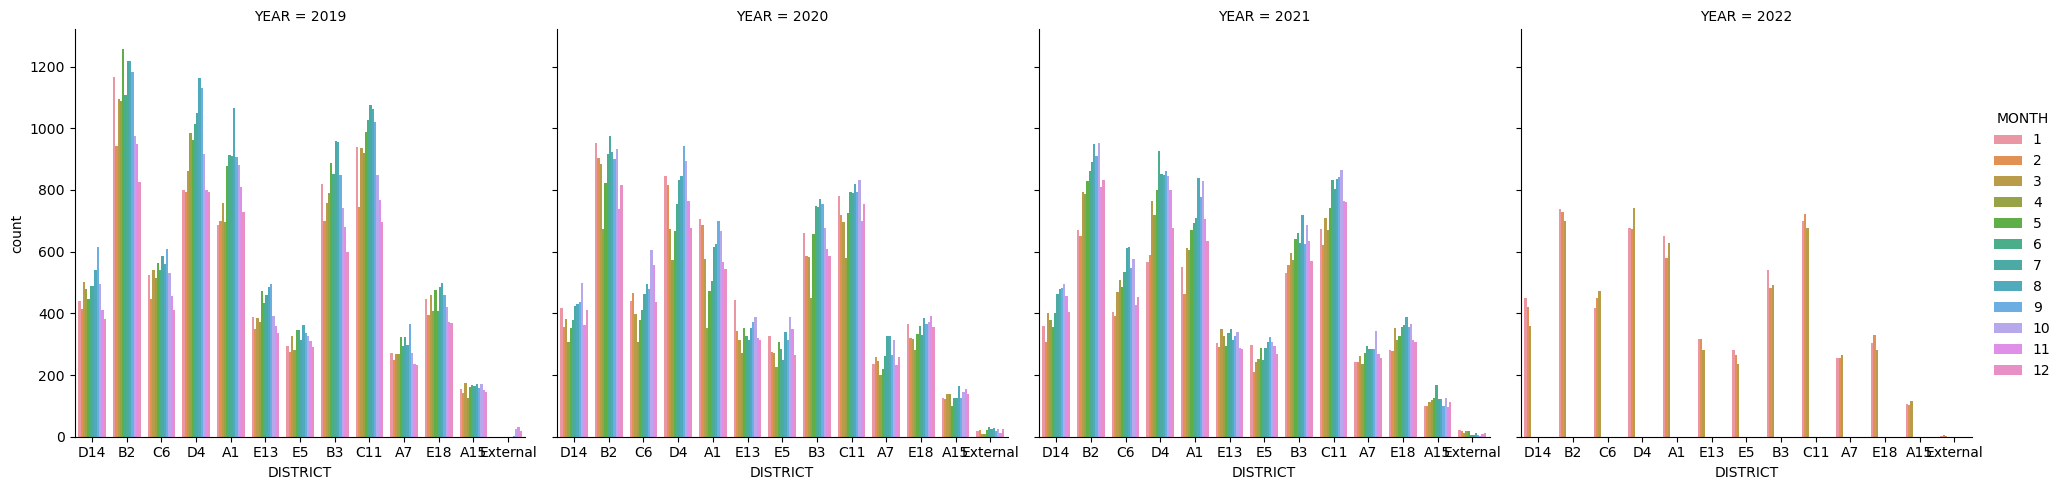

In [37]:
# 5.1.1 YEARWISE breakup of Crimes by District
sns.catplot(x="DISTRICT", 
            hue="MONTH",      
            col="YEAR",       
            data=data,
            kind="count")

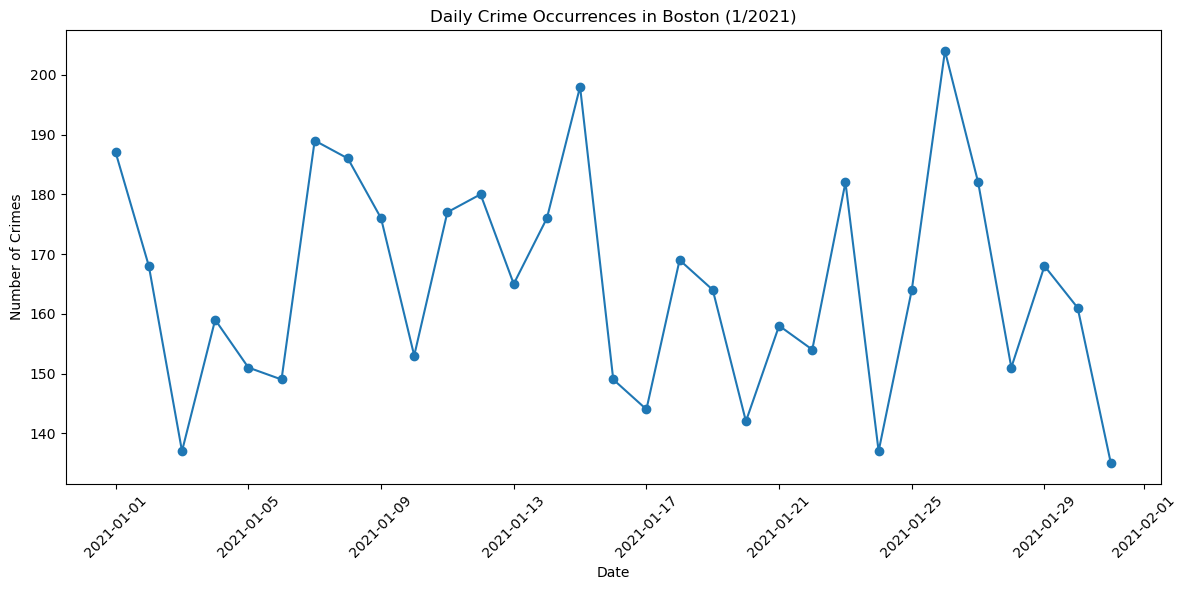

In [38]:
# Specify the month and year you want to plot
target_month = 1  # January
target_year = 2021

# Filter the dataset for the specified month and year
filtered_df = data[(data['OCCURRED_ON_DATE'].dt.month == target_month) & (data['OCCURRED_ON_DATE'].dt.year == target_year)]

# Group by date and count the number of occurrences
daily_crime_counts = filtered_df.groupby(filtered_df['OCCURRED_ON_DATE'].dt.date).size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_crime_counts.index, daily_crime_counts.values, marker='o', linestyle='-')
plt.title(f'Daily Crime Occurrences in Boston ({target_month}/{target_year})')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

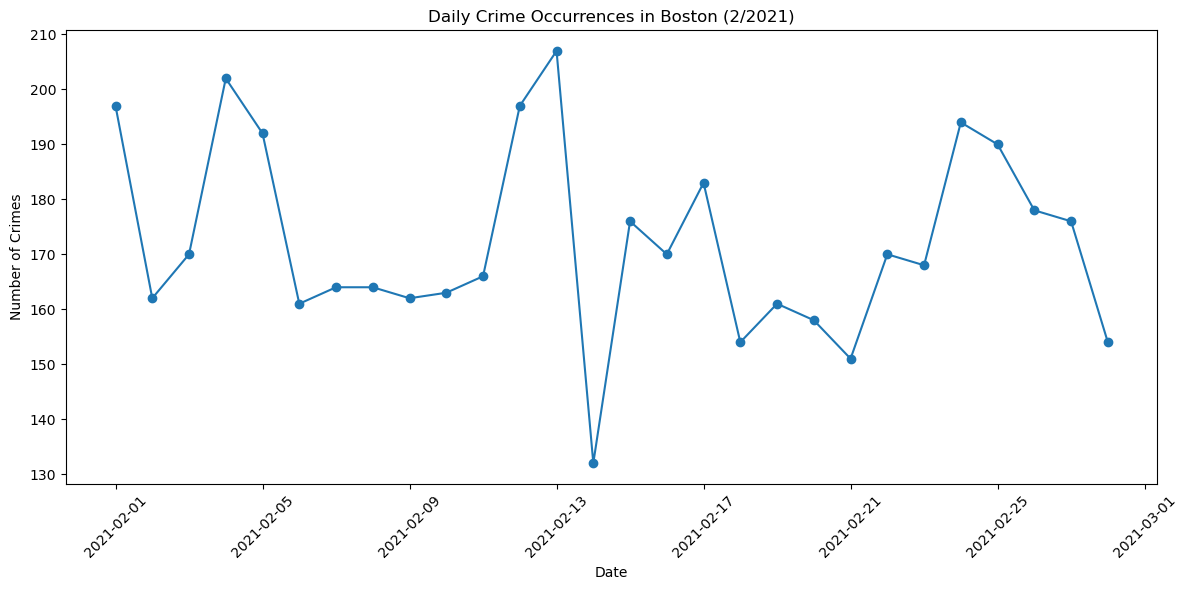

In [39]:
# Specify the month and year you want to plot
target_month = 2  # February
target_year = 2021

# Filter the dataset for the specified month and year
filtered_df = data[(data['OCCURRED_ON_DATE'].dt.month == target_month) & (data['OCCURRED_ON_DATE'].dt.year == target_year)]

# Group by date and count the number of occurrences
daily_crime_counts = filtered_df.groupby(filtered_df['OCCURRED_ON_DATE'].dt.date).size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_crime_counts.index, daily_crime_counts.values, marker='o', linestyle='-')
plt.title(f'Daily Crime Occurrences in Boston ({target_month}/{target_year})')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

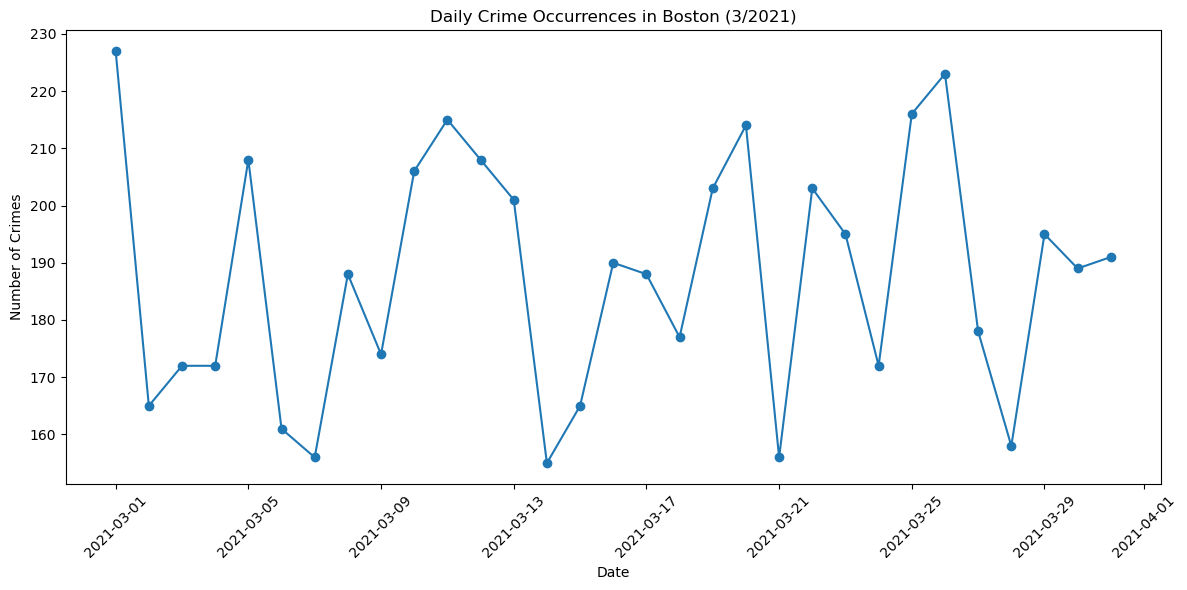

In [40]:
# Specify the month and year you want to plot
target_month = 3  # March
target_year = 2021

# Filter the dataset for the specified month and year
filtered_df = data[(data['OCCURRED_ON_DATE'].dt.month == target_month) & (data['OCCURRED_ON_DATE'].dt.year == target_year)]

# Group by date and count the number of occurrences
daily_crime_counts = filtered_df.groupby(filtered_df['OCCURRED_ON_DATE'].dt.date).size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_crime_counts.index, daily_crime_counts.values, marker='o', linestyle='-')
plt.title(f'Daily Crime Occurrences in Boston ({target_month}/{target_year})')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

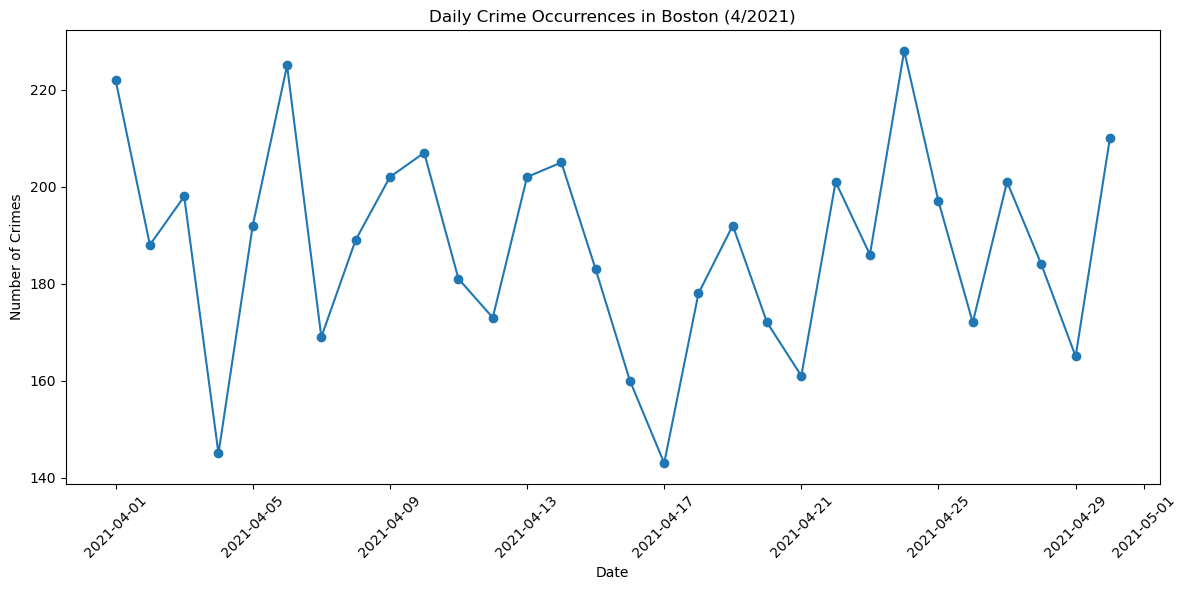

In [41]:
# Specify the month and year you want to plot
target_month = 4  # April
target_year = 2021

# Filter the dataset for the specified month and year
filtered_df = data[(data['OCCURRED_ON_DATE'].dt.month == target_month) & (data['OCCURRED_ON_DATE'].dt.year == target_year)]

# Group by date and count the number of occurrences
daily_crime_counts = filtered_df.groupby(filtered_df['OCCURRED_ON_DATE'].dt.date).size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_crime_counts.index, daily_crime_counts.values, marker='o', linestyle='-')
plt.title(f'Daily Crime Occurrences in Boston ({target_month}/{target_year})')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

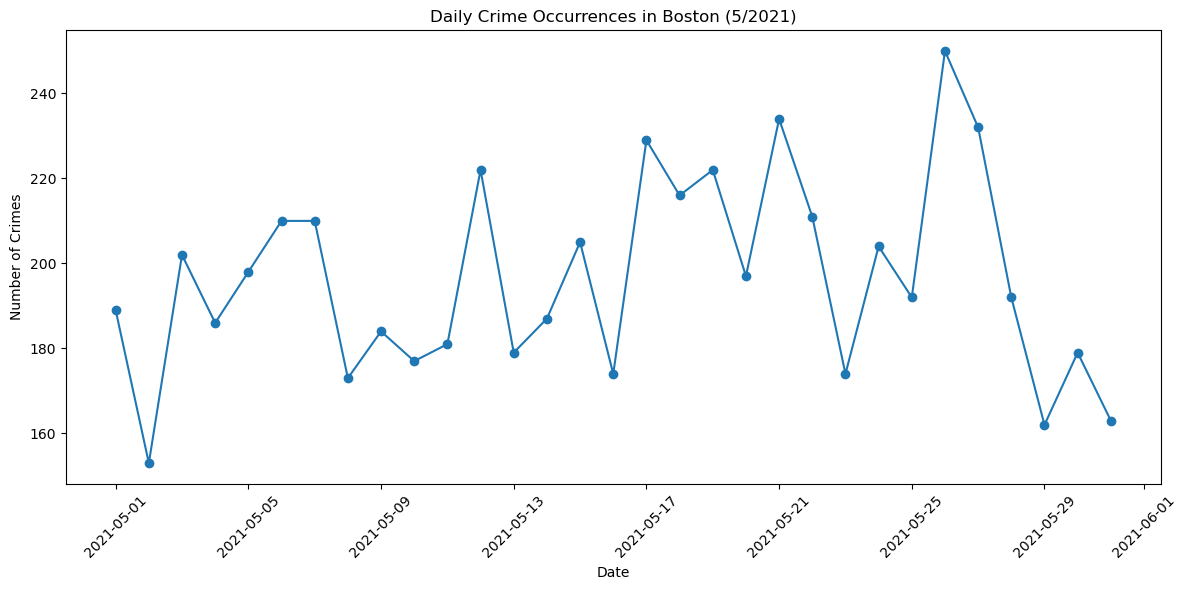

In [42]:
# Specify the month and year you want to plot
target_month = 5  # May
target_year = 2021

# Filter the dataset for the specified month and year
filtered_df = data[(data['OCCURRED_ON_DATE'].dt.month == target_month) & (data['OCCURRED_ON_DATE'].dt.year == target_year)]

# Group by date and count the number of occurrences
daily_crime_counts = filtered_df.groupby(filtered_df['OCCURRED_ON_DATE'].dt.date).size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_crime_counts.index, daily_crime_counts.values, marker='o', linestyle='-')
plt.title(f'Daily Crime Occurrences in Boston ({target_month}/{target_year})')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

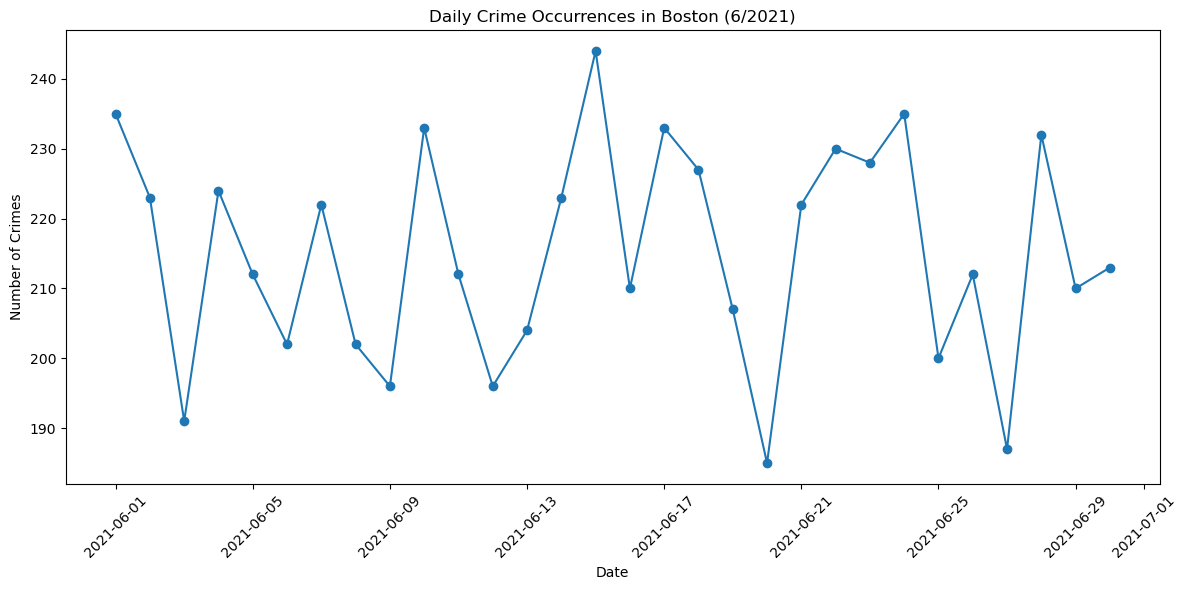

In [43]:
# Specify the month and year you want to plot
target_month = 6  # June
target_year = 2021

# Filter the dataset for the specified month and year
filtered_df = data[(data['OCCURRED_ON_DATE'].dt.month == target_month) & (data['OCCURRED_ON_DATE'].dt.year == target_year)]

# Group by date and count the number of occurrences
daily_crime_counts = filtered_df.groupby(filtered_df['OCCURRED_ON_DATE'].dt.date).size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_crime_counts.index, daily_crime_counts.values, marker='o', linestyle='-')
plt.title(f'Daily Crime Occurrences in Boston ({target_month}/{target_year})')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

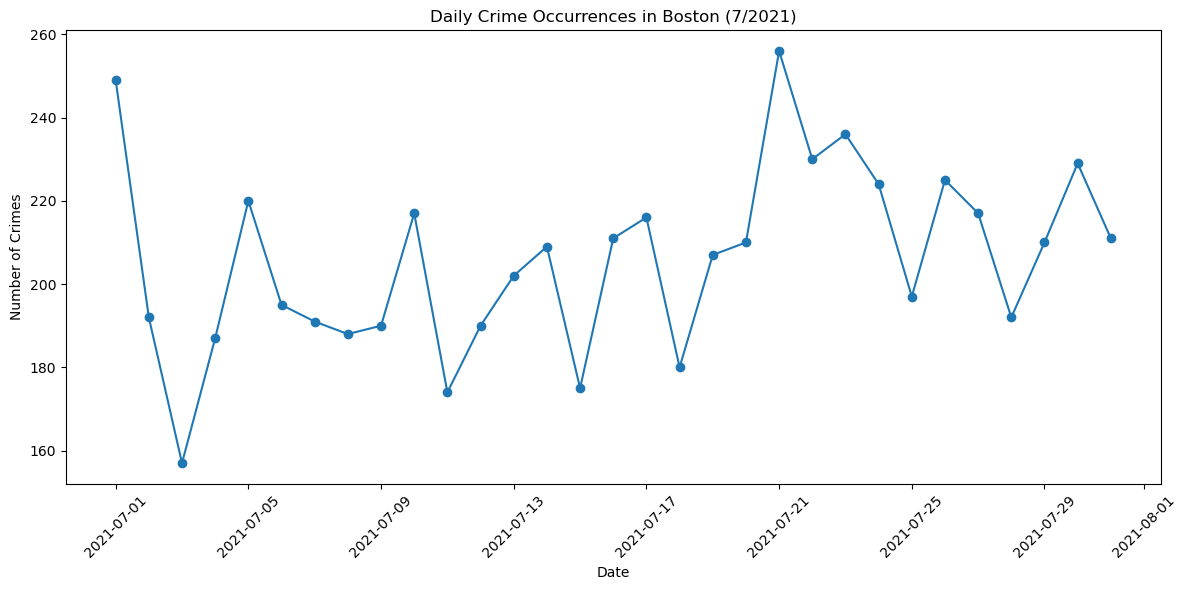

In [44]:
# Specify the month and year you want to plot
target_month = 7  # July
target_year = 2021

# Filter the dataset for the specified month and year
filtered_df = data[(data['OCCURRED_ON_DATE'].dt.month == target_month) & (data['OCCURRED_ON_DATE'].dt.year == target_year)]

# Group by date and count the number of occurrences
daily_crime_counts = filtered_df.groupby(filtered_df['OCCURRED_ON_DATE'].dt.date).size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_crime_counts.index, daily_crime_counts.values, marker='o', linestyle='-')
plt.title(f'Daily Crime Occurrences in Boston ({target_month}/{target_year})')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

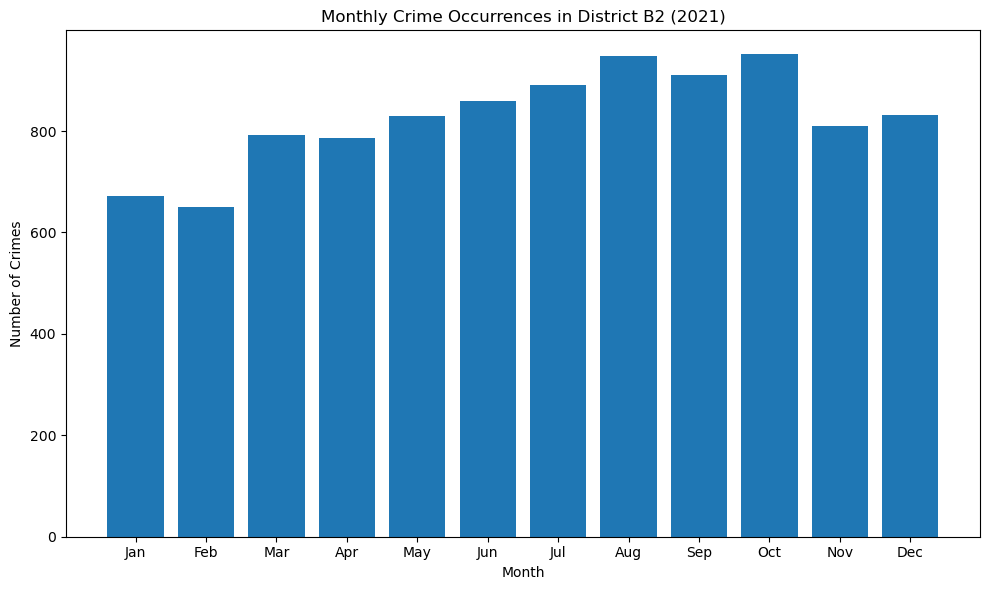

In [45]:
# Specify the district number and year you want to plot
target_district = "B2"  # Replace with your desired district number
target_year = 2021   # Replace with your desired year

# Filter the dataset for the specified district and year
filtered_df = data[(data['DISTRICT'] == target_district) & (data['OCCURRED_ON_DATE'].dt.year == target_year)]

# Group by month and count the number of occurrences
monthly_crime_counts = filtered_df.groupby(filtered_df['OCCURRED_ON_DATE'].dt.month).size()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_crime_counts.index, monthly_crime_counts.values)
plt.title(f'Monthly Crime Occurrences in District {target_district} ({target_year})')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

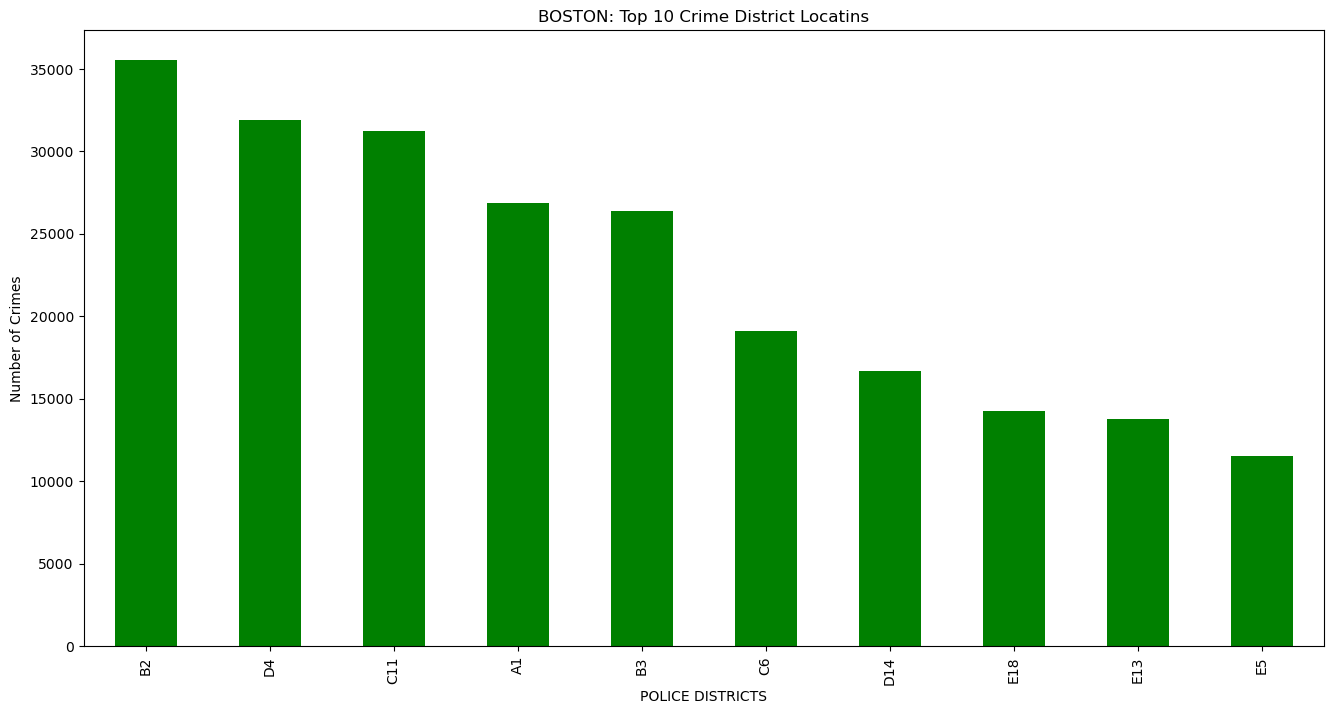

In [46]:
# 5.4 Top 10
# 5.4.1 Top 10 Crime District Locations
plt.figure(figsize=(16,8))
top10cloc = data.groupby('DISTRICT')['OFFENSE_CODE'].count().sort_values(ascending=False)
top10cloc = top10cloc [:10]
top10cloc.plot(kind='bar', color='green')
plt.ylabel('Number of Crimes')
plt.xlabel("POLICE DISTRICTS")
plt.title('BOSTON: Top 10 Crime District Locatins')
plt.show()

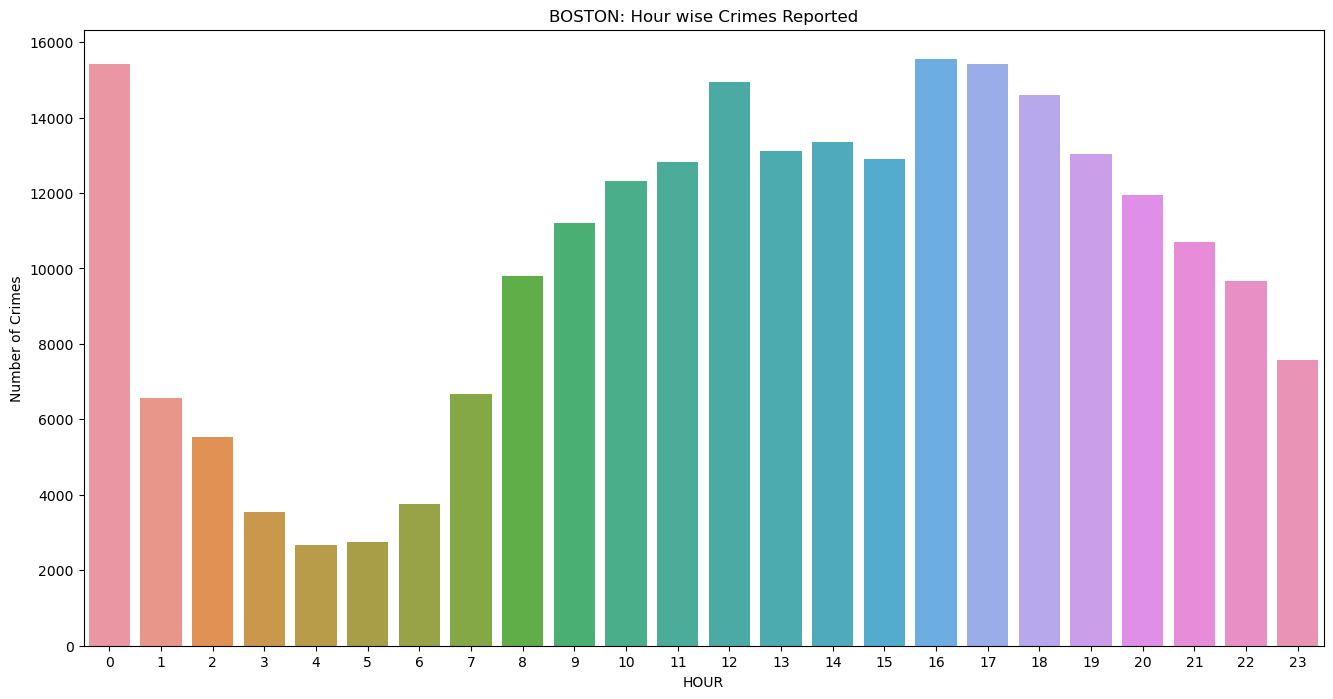

In [47]:
#We can consider patterns across several different time scales: hours of the day, days of the week, and months of the year.
# 5.6.1 Number of Crimes reported at Hour during the Day
plt.figure(figsize=(16,8))
sns.countplot(x='HOUR', data = data)
plt.ylabel('Number of Crimes')
plt.title('BOSTON: Hour wise Crimes Reported')
plt.show()
# Crimes are observed Least in Dawn. 

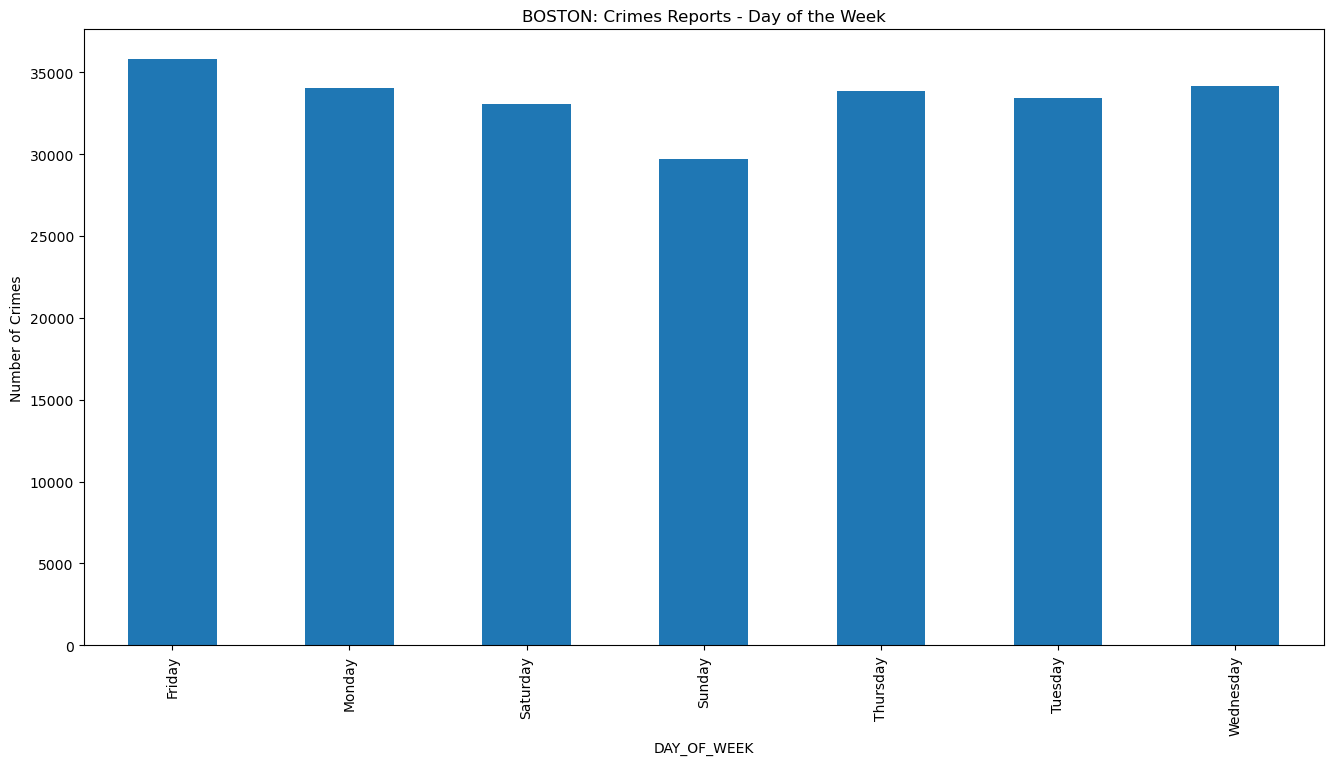

In [48]:
# 5.6.2 Comparing Weekly crimes
plt.figure(figsize=(16,8))
data.groupby(['DAY_OF_WEEK'])['OFFENSE_CODE_GROUP'].count().plot(kind = 'bar')
plt.ylabel('Number of Crimes')
plt.title('BOSTON: Crimes Reports - Day of the Week')
plt.show()

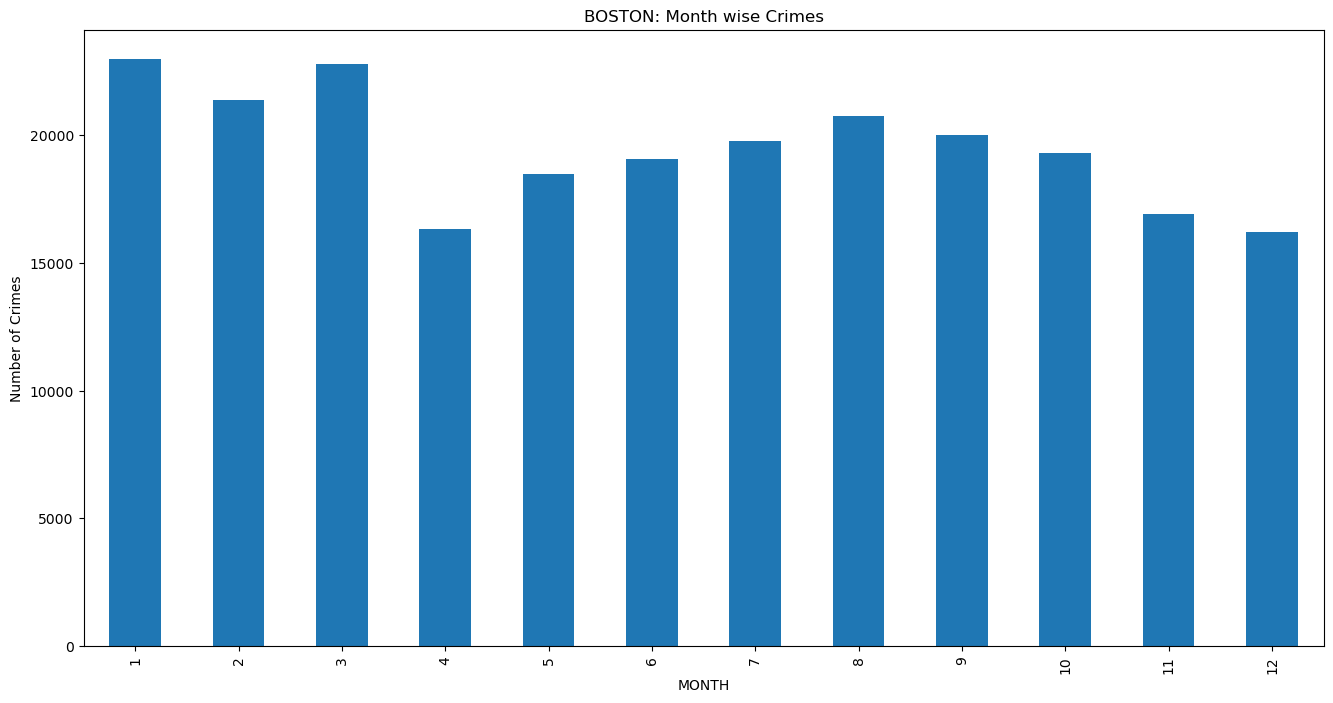

In [49]:
# 5.6.3 Comparing crimes during months.
plt.figure(figsize=(16,8))
data.groupby(['MONTH'])['OFFENSE_CODE_GROUP'].count().plot(kind = 'bar')
plt.ylabel('Number of Crimes')
plt.title('BOSTON: Month wise Crimes')
plt.show()

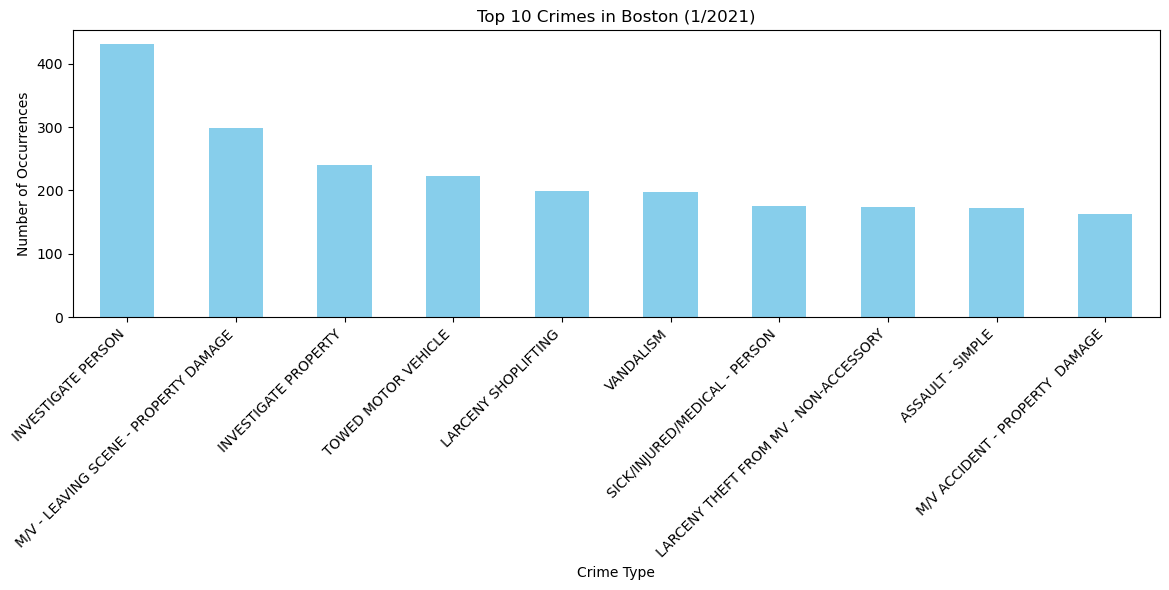

In [50]:
# Specify the month and year you want to analyze
target_month = 1  # January
target_year = 2021

# Filter the dataset for the specified month and year
filtered_df = data[(data['OCCURRED_ON_DATE'].dt.month == target_month) & (data['OCCURRED_ON_DATE'].dt.year == target_year)]

# Count the occurrences of each offense
offense_counts = filtered_df['OFFENSE_CODE_GROUP'].value_counts()

# Select the top 10 offenses
top_10_offenses = offense_counts.head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_10_offenses.plot(kind='bar', color='skyblue')
plt.title(f'Top 10 Crimes in Boston ({target_month}/{target_year})')
plt.xlabel('Crime Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:
dayHour = data.groupby(by=['DAY_OF_WEEK', 'HOUR']).count()['INCIDENT_NUMBER'].unstack()
dayHour

HOUR,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DAY_OF_WEEK,,,,,,,,,,,,,,,,,,,,,
Friday,2208,873,745,453,348,392,568,995,1517,1815,...,1974,2036,2400,2438,2228,1954,1736,1635,1581,1369
Monday,2333,764,695,422,370,386,595,1094,1551,1753,...,2043,1874,2366,2332,2206,1901,1670,1433,1215,910
Saturday,2327,1254,1204,703,497,440,436,864,1211,1313,...,1732,1704,1946,1944,1932,1832,1777,1613,1501,1378
Sunday,2279,1452,1202,815,511,433,393,598,954,1051,...,1595,1526,1858,1927,1805,1608,1585,1474,1344,933
Thursday,2151,726,587,373,342,343,577,995,1491,1761,...,2035,1956,2253,2227,2176,1952,1690,1508,1391,1034
Tuesday,2041,739,541,369,294,361,606,1020,1521,1750,...,1915,1926,2389,2243,2112,1846,1750,1483,1314,933
Wednesday,2088,763,564,402,316,400,582,1106,1555,1767,...,2069,1884,2339,2299,2150,1946,1729,1549,1315,1005


In [52]:
dayMonth = data.groupby(by=['DAY_OF_WEEK','MONTH']).count()['INCIDENT_NUMBER'].unstack()
dayMonth

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
DAY_OF_WEEK,,,,,,,,,,,,
Friday,3709,3469,3747,2440,3215,2806,3204,3218,2954,3371,2879,2567
Monday,3196,3250,3477,2577,2631,3064,2968,3285,3072,2614,2984,2572
Saturday,3296,3340,3336,2277,2801,2897,2767,3231,2817,3156,2522,2182
Sunday,2983,2701,3146,2077,2603,2535,2464,2944,2823,2495,2255,2143
Thursday,3664,3210,3190,2643,2854,2681,3067,3141,3008,3178,2321,2743
Tuesday,3460,3125,3490,2520,2295,3106,2924,3068,3106,2830,2687,2555
Wednesday,3563,3141,3309,2447,2910,2921,3312,2806,3351,2996,2469,2716


    MONTH  Crime_Count
0       1        23871
1       2        22236
2       3        23695
3       4        16981
4       5        19309
5       6        20010
6       7        20706
7       8        21693
8       9        21131
9      10        20640
10     11        18117
11     12        17478


NameError: name 'year_to_analyze' is not defined

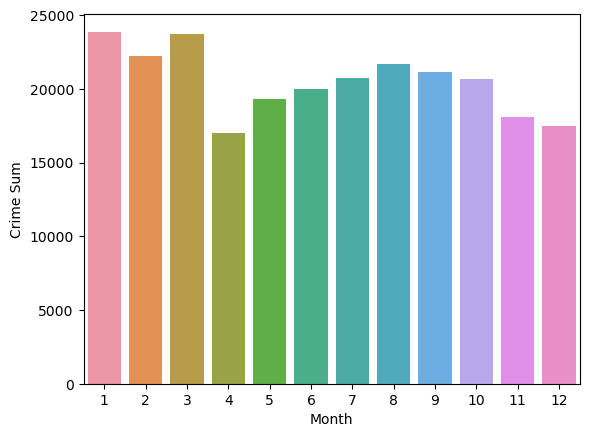

In [53]:
df1 = pd.DataFrame(data)

# Convert 'Date' column to datetime
df1['OCCURRED_ON_DATE'] = pd.to_datetime(df1['OCCURRED_ON_DATE'])

# Extract month and year from the 'Date' column
df1['MMONTH'] = df1['OCCURRED_ON_DATE'].dt.to_period('M')

# Calculate the number of crimes for each month
crimes_per_month = df1.groupby('MONTH').size().reset_index(name='Crime_Count')

# Display the resulting DataFrame
print(crimes_per_month)
# Plot the crimes per month
sns.barplot(x='MONTH', y='Crime_Count', data=crimes_per_month)
plt.xlabel('Month')
plt.ylabel('Crime Sum')
plt.title(f'Sum of Crimes Committed Each Month in {year_to_analyze}')
plt.show()

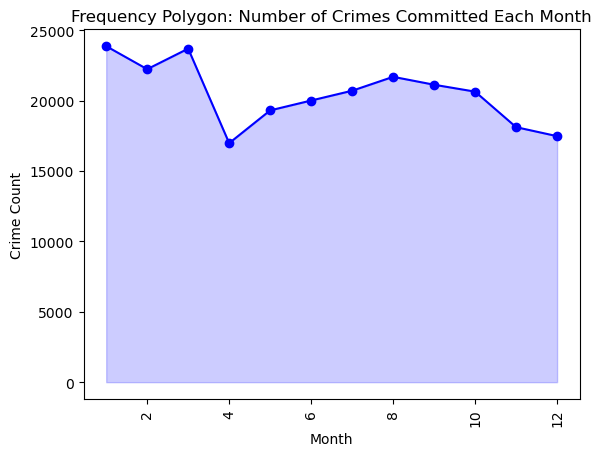

In [54]:
plt.plot(crimes_per_month['MONTH'], crimes_per_month['Crime_Count'], marker='o', linestyle='-', color='b')
plt.fill_between(crimes_per_month['MONTH'], crimes_per_month['Crime_Count'], color='b', alpha=0.2)
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.title('Frequency Polygon: Number of Crimes Committed Each Month')
plt.xticks(rotation=90)
plt.show()

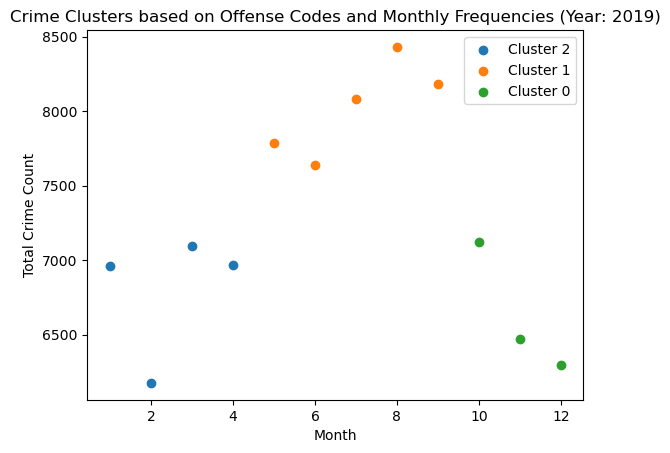

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Filter data for a specific year(2019)
crime_data_2019 = data[data['YEAR'] == 2019]

# Create a DataFrame with offense code frequencies in each month
crime_freq = crime_data_2019.groupby(['OFFENSE_CODE', 'MONTH']).size().reset_index(name='Frequency')

# Pivot the table to have 'OFFENSE_CODE' as columns
crime_pivot = crime_freq.pivot(index='MONTH', columns='OFFENSE_CODE', values='Frequency').fillna(0)

# Create clusters using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
crime_pivot['Cluster'] = kmeans.fit_predict(crime_pivot)

# Visualize clusters
for cluster_label in crime_pivot['Cluster'].unique():
    cluster_points = crime_pivot[crime_pivot['Cluster'] == cluster_label]
    plt.scatter(cluster_points.index, cluster_points.sum(axis=1), label=f'Cluster {cluster_label}')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Crime Count')
plt.title('Crime Clusters based on Offense Codes and Monthly Frequencies (Year: 2019)')
plt.legend()
plt.show()

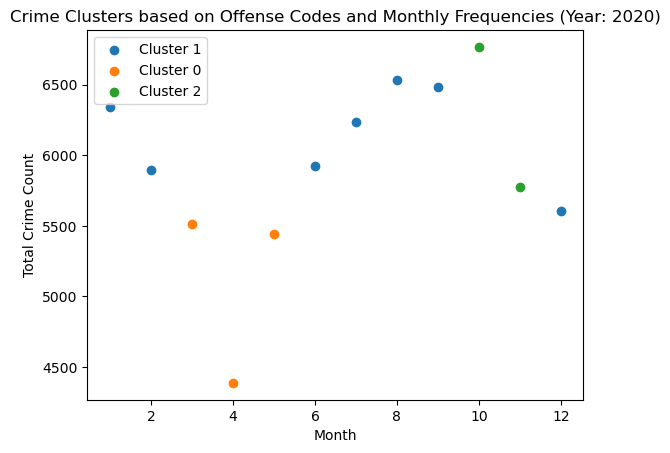

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Filter data for a specific year(2019)
crime_data_2020 = data[data['YEAR'] == 2020]

# Create a DataFrame with offense code frequencies in each month
crime_freq = crime_data_2020.groupby(['OFFENSE_CODE', 'MONTH']).size().reset_index(name='Frequency')

# Pivot the table to have 'OFFENSE_CODE' as columns
crime_pivot = crime_freq.pivot(index='MONTH', columns='OFFENSE_CODE', values='Frequency').fillna(0)

# Create clusters using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
crime_pivot['Cluster'] = kmeans.fit_predict(crime_pivot)

# Visualize clusters
for cluster_label in crime_pivot['Cluster'].unique():
    cluster_points = crime_pivot[crime_pivot['Cluster'] == cluster_label]
    plt.scatter(cluster_points.index, cluster_points.sum(axis=1), label=f'Cluster {cluster_label}')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Crime Count')
plt.title('Crime Clusters based on Offense Codes and Monthly Frequencies (Year: 2020)')
plt.legend()
plt.show()

In [57]:
crime_counts_per_month = data.groupby(['MONTH', 'OFFENSE_CODE']).size().reset_index(name='Crime_Count')

# Find the crime with the highest count for each month
most_common_crime_per_month = crime_counts_per_month.loc[crime_counts_per_month.groupby('MONTH')['Crime_Count'].idxmax()]

# Display the resulting DataFrame
print(most_common_crime_per_month)

      MONTH  OFFENSE_CODE  Crime_Count
128       1          3115         1874
298       2          3115         1774
467       3          3115         2040
629       4          3115         1339
803       5          3115         1472
978       6          3115         1469
1153      7          3115         1541
1328      8          3115         1591
1512      9          3115         1732
1633     10          3115         1650
1749     11          3115         1528
1862     12          3115         1471


In [58]:
top5_crimes_per_month = (
    crime_counts_per_month.groupby('MONTH')
                          .apply(lambda x: x.nlargest(5, 'Crime_Count'))
                          .reset_index(drop=True)
)

# Display the resulting DataFrame
print(top5_crimes_per_month)

    MONTH  OFFENSE_CODE  Crime_Count
0       1          3115         1874
1       1          3831         1388
2       1          3006         1124
3       1          3114         1061
4       1          3410          996
5       2          3115         1774
6       2          3831         1378
7       2          3114          940
8       2          3006          933
9       2          1402          920
10      3          3115         2040
11      3          3831         1414
12      3          3006         1084
13      3          3114         1075
14      3          1402         1037
15      4          3115         1339
16      4          3831          947
17      4          3006          864
18      4          1402          826
19      4          3114          811
20      5          3115         1472
21      5          3831         1063
22      5          3006          961
23      5          1402          912
24      5          3114          902
25      6          3115         1469
2

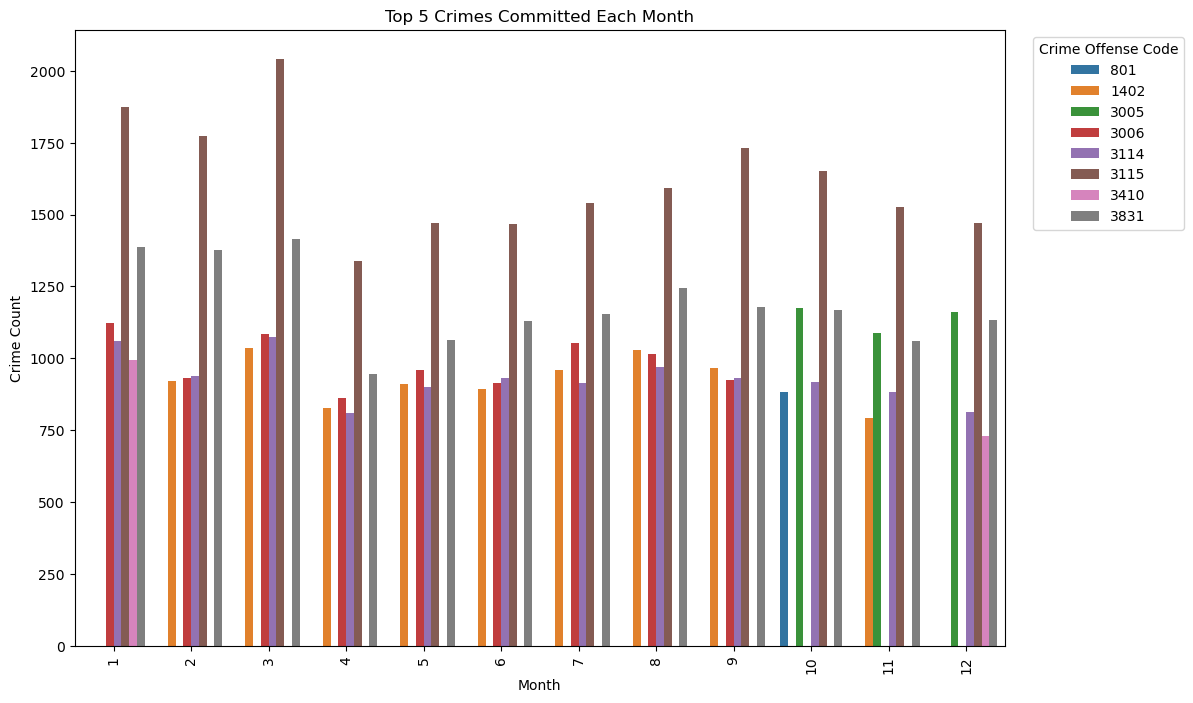

In [59]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(x='MONTH', y='Crime_Count', hue='OFFENSE_CODE', data=top5_crimes_per_month)
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.title('Top 5 Crimes Committed Each Month')
plt.xticks(rotation=90)
plt.legend(title='Crime Offense Code', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

#### 801-ASSAULT
#### 1402-VANDALISM
#### 3005-LEAVING SCENE-PERSONAL INJURY
#### 3006-PERSONAL INJURY
#### 3114-INVESTIGATE PROPERTY
#### 3115-INVESTIGATE PERSON
#### 3410-TOWED MOTOR VEHICLE
#### 3831-M/V -LEAVING SCENE - PROPERTY DAMAGE

In [60]:
df2 = pd.DataFrame(data)

# Convert 'Date' column to datetime
df2['OCCURRED_ON_DATE'] = pd.to_datetime(df2['OCCURRED_ON_DATE'])

# Extract month and year from the 'Date' column
df2['MONTH'] = df2['OCCURRED_ON_DATE'].dt.to_period('M')

# Filter data for the specified year (2021) and first three months
year_to_forecast = 2021
months_to_forecast = [1,2,3]

filtered_data = df2[(df2['OCCURRED_ON_DATE'].dt.year == year_to_forecast) & (df2['OCCURRED_ON_DATE'].dt.month.isin(months_to_forecast))]

# Calculate the number of crimes for each month
crimes_per_month3 = filtered_data.groupby('MONTH').size().reset_index(name='Crime_Count1')

# Display the resulting DataFrame
print(crimes_per_month3)

     MONTH  Crime_Count1
0  2021-01          5115
1  2021-02          4822
2  2021-03          5821


In [61]:
from statsmodels.tsa.arima.model import ARIMA
# Fit an ARIMA model
model = ARIMA(crimes_per_month3['Crime_Count1'], order=(1, 1, 1))  # Adjust order as needed
fit_model = model.fit()

# Make predictions
predictions = fit_model.predict(start=len(crimes_per_month3), end=len(crimes_per_month3) + 2, typ='levels')  # Forecast for three months

# Display the predictions
print("ARIMA Predictions:")
print(predictions)

ARIMA Predictions:
3    5219.915047
4    5820.910878
5    5220.004155
Name: predicted_mean, dtype: float64


Total number of crimes in the three months: 15758
3    5219.915047
4    5820.910878
5    5220.004155
Name: predicted_mean, dtype: float64


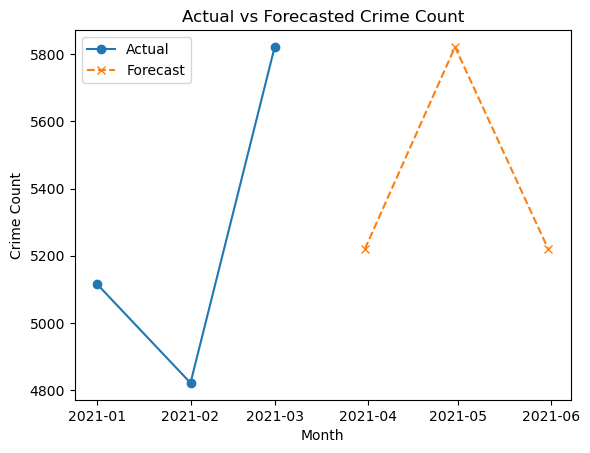

Mean Absolute Error (MAE): 568.2739233215956
Mean Squared Error (MSE): 456675.3717883599


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate the total number of crimes in the three months
total_crimes = crimes_per_month3['Crime_Count1'].sum()
print(f'Total number of crimes in the three months: {total_crimes}')

# Fit an ARIMA model
model = ARIMA(crimes_per_month3['Crime_Count1'], order=(1, 1, 1))  # Adjust order as needed
fit_model = model.fit()

# Make predictions for the next three months
future_periods = 3
forecast = fit_model.predict(start=len(crimes_per_month3), end=len(crimes_per_month3) + future_periods - 1, typ='levels')

#Predictions for the next three months
print(forecast)

# Visualize the results
plt.plot(crimes_per_month3['MONTH'].dt.to_timestamp(), crimes_per_month3['Crime_Count1'], label='Actual', marker='o')
plt.plot(pd.date_range(start='2021-03', periods=future_periods, freq='M'), forecast, label='Forecast', linestyle='dashed', marker='x')
plt.title('Actual vs Forecasted Crime Count')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.legend()
plt.show()

# Evaluate the forecast
mae = mean_absolute_error(crimes_per_month3['Crime_Count1'], forecast)
mse = mean_squared_error(crimes_per_month3['Crime_Count1'], forecast)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')


In [63]:
festivals=pd.read_excel("festivals.xlsx")

In [64]:
festivals

,Event,Date,Venue,Neighborhood,Event type,Month Number
0,L Street Brownies swim,2018-01-01,Curley Community Center,South Boston,Open water swimming,1
1,Boston Science Fiction Film Festival,2018-02-09,Somerville Theatre,Somerville,Festival,2
2,Truck Day,2018-02-08,Fenway Park,Kenmore Square,Celebration,2
3,St. Patrick's Day Parade,2018-03-17,"West/East Broadway, Thomas Park, Telegraph St....",South Boston,Festival/Parade,3
4,Boston Marathon,2018-04-16,"Within the city, predominately on Commonwealth...","Back Bay, Fenway-Kenmore, Allston/Brighton",Marathon,4
5,Patriot's Day Parade,2018-04-17,"City Hall Plaza, Kings Chapel, Paul Revere Mal...",Downtown Boston,Parade/re-enactment,4
6,Greek Independence Parade,2018-04-26,Boylston St.,Back Bay,Parade,4
7,Walk for Hunger,2018-05-06,Boston Common,Downtown Boston,Pledge Walk,5
8,Haitian Parade,2018-05-18,"Mattapan Square, Blue Hill Ave.",Mattapan/Dorchester,Festival/Parade,5
9,June Day Parade-AHAC Change of Command Ceremonies,2018-06-07,Faneuil Hall/Boston Common,Boston,Parade,6
